# Newton-Raphson Multidimensional

## Problema 3

### 3.3.1 Parte a: Función de Rosenbrock (3D)

Se va a implementar el método de Newton-Raphson multidimensional para encontrar los mínimos y máximos de la siguiente función:
$$
f(x,y) = (x-1)^2 +100 (y-x^2)^2
$$
en el punto (0,10)

In [1]:
import numpy as np
import scipy as sp
from scipy.misc import derivative
import sympy as sp
import random
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

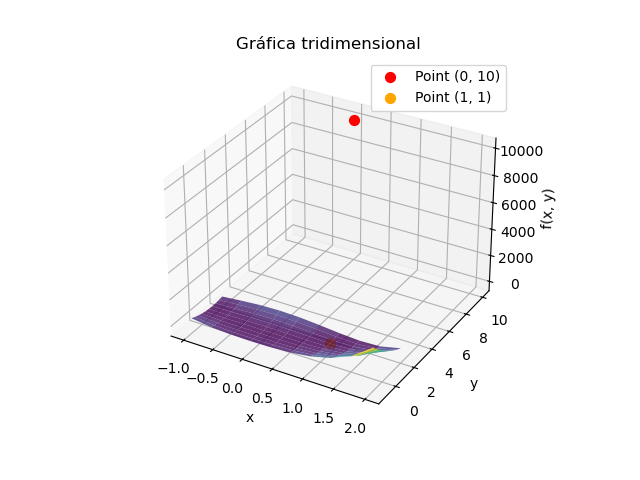

In [2]:
%matplotlib widget 
# Función f(x,y)
f = lambda x, y: (x - 1)**2 + 100 * (y - x**2)**2

x = np.linspace(-1, 2, 10)
y = np.linspace(-1, 2, 10)
  
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.scatter(0, 10, f(0, 10), color='red', s=50, label='Point (0, 10)')
ax.scatter(1, 1, f(1, 1), color='orange', s=50, label='Point (1, 1)')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Gráfica tridimensional')
ax.legend()

plt.show()

#### Gradiente de f(x,y):

In [3]:
x, y = sp.symbols('x y', real=True)
func = (x - 1)**2 + 100 * (y - x**2)**2
def vector_grad(func, x,y):

    dif_x = sp.diff(func, x)
    dif_y = sp.diff(func,y)
    #Evaluar en el punto (0,10)
    grad_x_func = sp.lambdify((x, y), dif_x, 'numpy')
    grad_y_func = sp.lambdify((x, y), dif_y, 'numpy')
    return grad_x_func, grad_y_func

grad_x, grad_y = vector_grad(func, x, y)
print(f"los valores del gradiente en (0,10) son {grad_x(0,10)} y {grad_y(0,10)}")

los valores del gradiente en (0,10) son -2 y 2000


#### Matriz hessiana de f(x,y):

In [4]:
def calc_hessiana (func, x, y):
    # Primeras derivadas
    dif_x = sp.diff(func, x)
    dif_y = sp.diff(func, y)
    # Segundas derivadas
    dif_xx = sp.diff(dif_x, x)  #dx^2
    dif_xy = sp.diff(dif_x, y)  #dxdy
    dif_yx = sp.diff(dif_y, x)  #dydx
    dif_yy = sp.diff(dif_y, y)  #dy^2

    #Matriz
    Hessiana = sp.Matrix([[dif_xx, dif_xy], [dif_yx, dif_yy]])

    # Matriz Hessiana en el punto de inicio
    Hessiana_punto = Hessiana.subs({x: 0, y: 10})
    return Hessiana,Hessiana_punto
Hessiana, Hessiana_punto = calc_hessiana(func, x,y)
# Print the Hessian matrix
print("Matriz Hessiana:")
print(Hessiana)

print("Matriz evaluada en (0, 10):")
sp.pprint(Hessiana_punto)

Matriz Hessiana:
Matrix([[1200*x**2 - 400*y + 2, -400*x], [-400*x, 200]])
Matriz evaluada en (0, 10):
⎡-3998   0 ⎤
⎢          ⎥
⎣  0    200⎦


In [5]:
def Multi_2D_Newton(func, tolerance, x_inicial,y_inicial, x, y):
    grad_x_func, grad_y_func = vector_grad(func, x, y)
    
    # Matriz Hessiana
    Hessiana, H_punto = calc_hessiana(func, x, y)
    hess_xx_func = sp.lambdify((x, y), Hessiana[0, 0], 'numpy')
    hess_xy_func = sp.lambdify((x, y), Hessiana[0, 1], 'numpy')
    hess_yx_func = sp.lambdify((x, y), Hessiana[1, 0], 'numpy')
    hess_yy_func = sp.lambdify((x, y), Hessiana[1, 1], 'numpy')
    
    n = 0
    actual_tol = 999
    x_k = np.array([x_inicial,y_inicial], dtype=float)
    puntos_iterativos = [x_k]
    max_iter = 1000
    
    while actual_tol > tolerance and n < max_iter:
        #Gradiente evaluado en el punto
        grad = np.array([grad_x_func(x_k[0], x_k[1]), grad_y_func(x_k[0], x_k[1])], dtype=float)
        #Hessiana evaluada en el punto
        hess = np.array([[hess_xx_func(x_k[0], x_k[1]), hess_xy_func(x_k[0], x_k[1])],
                         [hess_yx_func(x_k[0], x_k[1]), hess_yy_func(x_k[0], x_k[1])]], dtype=float)
        
        #Esto sirve somehow
        x_kplus1 = x_k - np.linalg.solve(hess, grad)
        puntos_iterativos.append(x_kplus1)
        actual_tol = np.linalg.norm(x_kplus1 - x_k)
        print(f"Norma del gradiente: {actual_tol}")
        n += 1
        x_k = x_kplus1
    
    eigenvals = np.linalg.eigvals(hess)
    if all(eig > 0 for eig in eigenvals):
        optimo = "min"
        print(f"Mínimo local comenzando en ({x_inicial}, {y_inicial}) = {x_kplus1}")
    elif all(eig < 0 for eig in eigenvals):
        optimo = "max"
        print(f"Máximo local comenzando en ({x_inicial}, {y_inicial}) = {x_kplus1}")
    else:
        optimo = "saddle"
        print(f"Punto de silla en (x, y) = {x_kplus1}")
    
    return optimo, x_kplus1, actual_tol, puntos_iterativos

valor_tol = 0.001
optimo, punto_resp, actual_tol, puntos_it = Multi_2D_Newton(func, valor_tol, 0,10, x,y)

Norma del gradiente: 10.000000012512508
Norma del gradiente: 1.0004506780313538
Norma del gradiente: 1.0009010555356654
Norma del gradiente: 0.0001114046829316983
Mínimo local comenzando en (0, 10) = [1. 1.]


Se pueden revisar todos los puntos que fueron calculados por el método de Newton-Raphson en cada una de las iteraciones

In [6]:
for punto in puntos_it:
    print(punto)

[ 0. 10.]
[-0.00050025  0.        ]
[ 0.99994993 -0.0010007 ]
[0.99995018 0.99990036]
[1. 1.]


## Análisis de la convergencia

Con la variable `puntos_it` se puede analizar cada uno de los puntos que se fueron calculando con cada iteración del método de Newton-Raphson

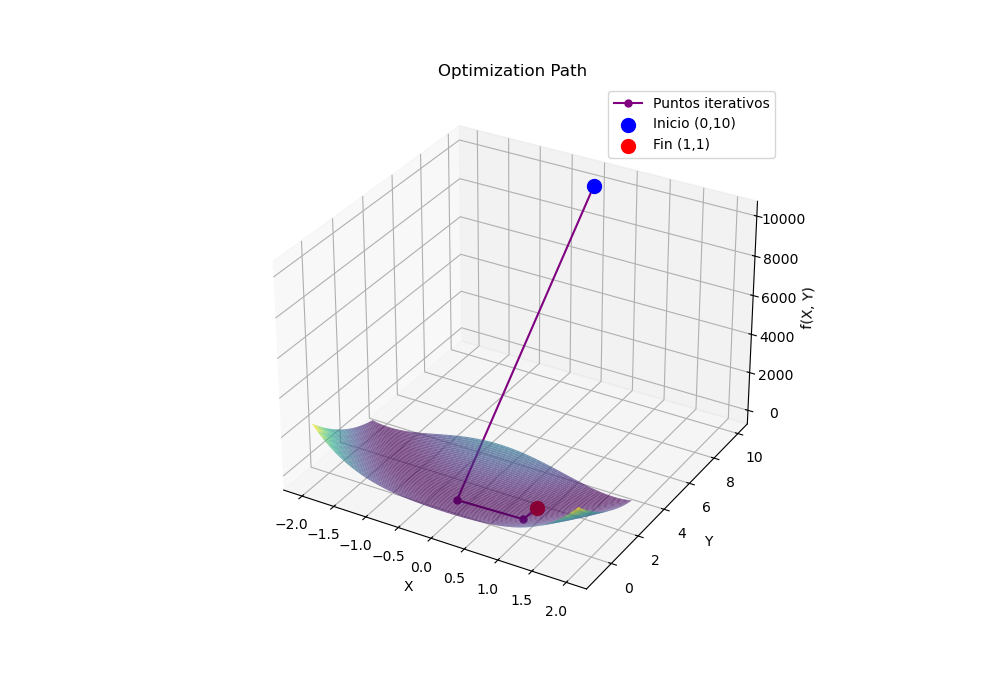

In [7]:
#Se convierte en una lambda function para poder usar numpy
func_lambda = sp.lambdify((x, y), func, 'numpy')

# Definir parametros para el grafico
X = np.linspace(-2, 2, 100)
Y = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(X, Y)
Z = func_lambda(X, Y)


puntos_it = np.array(puntos_it) 
X_traj, Y_traj = puntos_it[:, 0], puntos_it[:, 1]
Z_traj = func_lambda(X_traj, Y_traj)


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)
ax.plot(X_traj, Y_traj, Z_traj, marker='o', color='purple', markersize=5, label="Puntos iterativos")

#Puntos de inicio y fin
ax.scatter(X_traj[0], Y_traj[0], Z_traj[0], color='blue', s=100, label="Inicio (0,10)")
ax.scatter(X_traj[-1], Y_traj[-1], Z_traj[-1], color='red', s=100, label="Fin (1,1)")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')
ax.set_title('Optimization Path')

ax.legend()
plt.show()

# Parte b: Función en 4D

Se va a analizar la siguiente función en cuatro dimensiones:
$$
f(x,y,z) = (x-1)^2 + (y-2)^2 + (z-3)^2
$$

Utilizando el método de Newton Raphson para encontrar el mínimo global, se pueden reutilizar las funciones definidas en el punto anterior, solo teniendo que cambiar la lógica de manera ligera para que puedan funcionar con 3 variables

In [8]:
x, y, z = sp.symbols('x y z', real=True)
funcR3 = (x - 1)**2 + 100 + (y - 2)**2 + (z-3)**2

Vamos a escoger el punto (0,0,0) como punto inicial para encontrar el mínimo global

### Método para calcular gradientes

In [9]:
def vector_grad(func, x, y, z):

    dif_x = sp.diff(func, x)
    dif_y = sp.diff(func,y)
    dif_z = sp.diff(func,z)

    grad_x_func = sp.lambdify((x, y, z), dif_x, 'numpy')
    grad_y_func = sp.lambdify((x, y, z), dif_y, 'numpy')
    grad_z_func = sp.lambdify((x, y, z), dif_z, 'numpy')
    return grad_x_func, grad_y_func, grad_z_func


grad_x, grad_y, grad_z = vector_grad(funcR3, x, y, z)


### Calcular la matriz hessiana

In [10]:
def calc_hessiana (func, x, y,z):
    # Primeras derivadas
    dif_x = sp.diff(func, x)
    dif_y = sp.diff(func, y)
    dif_z = sp.diff(func, z)
    # Segundas derivadas
    ## Primera fila
    dif_xx = sp.diff(dif_x, x)  #dx^2
    dif_xy = sp.diff(dif_x, y)  #dxdy
    dif_xz = sp.diff(dif_x, z)  #dxdz  

    ## Segunda fila
    dif_yx = sp.diff(dif_y, x)  #dydx
    dif_yy = sp.diff(dif_y, y)  #dy^2
    dif_yz = sp.diff(dif_y, z)  #dydz

    ## Tercera fila
    dif_zx = sp.diff(dif_z, x)  #dzdx
    dif_zy = sp.diff(dif_z, y)  #dzdy
    dif_zz = sp.diff(dif_z, z)  #dz^2
    #Matriz
    Hessiana = sp.Matrix([[dif_xx, dif_xy,dif_xz], 
                          [dif_yx, dif_yy,dif_yz],
                          [dif_zx,dif_zy,dif_zz]])

    # Matriz Hessiana en el punto de inicio
    Hessiana_punto = Hessiana.subs({x: 0, y: 0, z:0})
    return Hessiana,Hessiana_punto
Hessiana, Hessiana_punto = calc_hessiana(funcR3, x,y,z)
# Print the Hessian matrix
print("Matriz Hessiana:")
print(Hessiana)
print("Matriz Hessiana en (0,0,0):")
print(Hessiana_punto)

Matriz Hessiana:
Matrix([[2, 0, 0], [0, 2, 0], [0, 0, 2]])
Matriz Hessiana en (0,0,0):
Matrix([[2, 0, 0], [0, 2, 0], [0, 0, 2]])


In [13]:
def Multi_3D_Newton(funcR4, tolerance, x_inicial,y_inicial, z_inicial, x, y,z):
    #Calcular los gradientes con la función definida previamente
    grad_x_func, grad_y_func, grad_z_func = vector_grad(funcR4, x, y,z)
    
    # Matriz Hessiana
    Hessiana, H_punto = calc_hessiana(funcR4, x, y,z)
    hess_xx_func = sp.lambdify((x, y, z), Hessiana[0, 0], 'numpy')
    hess_xy_func = sp.lambdify((x, y, z), Hessiana[0, 1], 'numpy')
    hess_xz_func = sp.lambdify((x, y, z), Hessiana[0, 2], 'numpy')

    hess_yx_func = sp.lambdify((x, y, z), Hessiana[1, 0], 'numpy')
    hess_yy_func = sp.lambdify((x, y, z), Hessiana[1, 1], 'numpy')
    hess_yz_func = sp.lambdify((x, y, z), Hessiana[1, 2], 'numpy')

    hess_zx_func = sp.lambdify((x, y, z), Hessiana[2, 0], 'numpy')
    hess_zy_func = sp.lambdify((x, y, z), Hessiana[2, 1], 'numpy')
    hess_zz_func = sp.lambdify((x, y, z), Hessiana[2, 2], 'numpy')
    
    n = 0
    actual_tol = 999
    x_k = np.array([x_inicial,y_inicial, z_inicial], dtype=float)
    puntos_iterativos = [x_k]
    max_iter = 1000
    
    while actual_tol > tolerance and n < max_iter:
        #Gradiente evaluado en el punto
        grad = np.array([
            grad_x_func(x_k[0], x_k[1], x_k[2]),
            grad_y_func(x_k[0], x_k[1], x_k[2]),
            grad_z_func(x_k[0], x_k[1], x_k[2])
        ], dtype=float)

        #Hessiana evaluada en el punto
        hess = np.array([
            [hess_xx_func(x_k[0], x_k[1], x_k[2]), hess_xy_func(x_k[0], x_k[1], x_k[2]), hess_xz_func(x_k[0], x_k[1], x_k[2])],
            [hess_yx_func(x_k[0], x_k[1], x_k[2]), hess_yy_func(x_k[0], x_k[1], x_k[2]), hess_yz_func(x_k[0], x_k[1], x_k[2])],
            [hess_zx_func(x_k[0], x_k[1], x_k[2]), hess_zy_func(x_k[0], x_k[1], x_k[2]), hess_zz_func(x_k[0], x_k[1], x_k[2])]
        ], dtype=float)
        
        #Calcular el siguiente punto
        x_kplus1 = x_k - np.linalg.solve(hess, grad)

        puntos_iterativos.append(x_kplus1)
        actual_tol = np.linalg.norm(x_kplus1 - x_k)
        print(f"Norma del gradiente: {actual_tol}")
        n += 1
        x_k = x_kplus1
    
    eigenvals = np.linalg.eigvals(hess)
    if all(eig > 0 for eig in eigenvals):
        optimo = "min"
        print(f"Mínimo local comenzando en ({x_inicial}, {y_inicial},{z_inicial}) = {x_kplus1}")
    elif all(eig < 0 for eig in eigenvals):
        optimo = "max"
        print(f"Máximo local comenzando en ({x_inicial}, {y_inicial},{z_inicial}) = {x_kplus1}")
    else:
        optimo = "saddle"
        print(f"Punto de silla en ({x_inicial}, {y_inicial},{z_inicial}) = {x_kplus1}")
    
    return optimo, x_kplus1, actual_tol, puntos_iterativos

valor_tol = 0.0000001
optimo, punto_resp, actual_tol, puntos_it = Multi_3D_Newton(funcR3, valor_tol, 110,-20,50, x,y,z)

Norma del gradiente: 120.72282302862206
Norma del gradiente: 0.0
Mínimo local comenzando en (110, -20,50) = [1. 2. 3.]
